In [1]:
from data_processing import load_Langs,Lang

input_lang, output_lang, pairs=load_Langs()

cpu
['他 能够 超越 所有 困难 。', 'He can overcome any obstacle .']


In [3]:
from evaluate import *

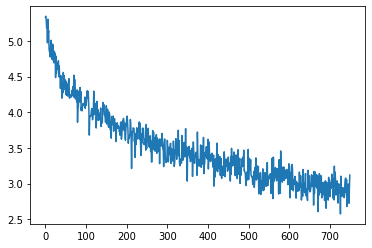

In [6]:
# if __name__=='__main__':
hidden_size = 256
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
encoder1_sd=torch.load(MODEL_PATH+'/encoder1.pt', map_location='cpu')
encoder1.load_state_dict(encoder1_sd)

attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)
attn_decoder1_sd=torch.load(MODEL_PATH+'/attn_decoder1.pt', map_location='cpu')
attn_decoder1.load_state_dict(attn_decoder1_sd)
# trainIters(encoder1, attn_decoder1, 75000, print_every=5000)
plot_losses=torch.load(MODEL_PATH+'/plot_losses.pt', map_location='cpu')
plt.plot(plot_losses)
plt.savefig('loss.jpg',dpi=400)

In [7]:
evaluateRandomly(input_lang, output_lang, pairs,encoder1, attn_decoder1)

> 我 不 知道 要 穿 什么 。
= I have no idea what to wear .
< I don t know what to . . <EOS>

> 我 跟 这件 事 无关 。
= I have nothing to do with the affair .
< I have nothing to do with the . <EOS>

> 昨天 我 买 了 这个 。
= I bought this yesterday .
< I bought this this . <EOS>

> 我 想 看 一下 里面 有 什么 。
= I want to see what there is inside .
< I want to to to . . <EOS>

> 他 给 了 她 一张 纸 。
= He gave her a piece of paper .
< He gave a a of <EOS>

> 这个 网站 看起来 不错 。
= This website seems quite good .
< This room looks very . <EOS>

> 他 对 政治 没有 兴趣 。
= He has no interest in politics .
< He has no interested in . <EOS>

> 下 一个 是 谁 ？
= Who s next ?
< Who is a tonight ? <EOS>

> 屁话 ！
= Nonsense !
< What a ! <EOS>

> 她 边走边谈 。
= She talked as she walked .
< She s a . <EOS>



In [10]:
import jieba

In [16]:
def translate(cn_sentence):
    cn_cut=' '.join(jieba.cut(cn_sentence))
    print(cn_cut)
    en_cut=evaluate(input_lang, output_lang, pairs,encoder1, attn_decoder1, cn_cut)[0]
    return ' '.join(en_cut)

In [30]:
translate('我喜欢吃苹果')

我 喜欢 吃 苹果


'I prefer eating apples . <EOS>'